In [ ]:
  # Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE


# **Problem statement : Airline Passenger Satisfaction PREDICTION**



It's important to understand what makes passengers happy. Our goal is to predict whether a passenger is satisfied based on their travel experience and how they rate the airline's services

In [ ]:
#https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction/data

Features:

- satisfaction – Overall satisfaction of the passenger (e.g., Satisfied, Neutral or Dissatisfied).

- Gender – Gender of the passenger (Male/Female).

- Customer Type – Type of customer (e.g., Loyal Customer, Disloyal Customer).

- Age – Age of the passenger.

- Type of Travel – Purpose of travel (e.g., Business travel, Personal travel).

- Class – Travel class (e.g., Economy, Business, Eco Plus).

- Flight Distance – Distance of the flight in miles.

- Seat comfort – Rating of seat comfort (usually on a scale, e.g., 1 to 5).

- Departure/Arrival time convenient – Rating of convenience of departure and arrival times.

- Food and drink – Rating of the food and drink quality.

- Gate location – Rating of gate location convenience.

- Inflight wifi service – Rating of in-flight Wi-Fi service quality.

- Inflight entertainment – Rating of in-flight entertainment.

- Online support – Rating of support through online channels.

- Ease of Online booking – Rating of ease of booking tickets online.

- On-board service – Rating of on-board services.

- Leg room service – Rating of leg room available during flight.

- Baggage handling – Rating of baggage handling process.

- Checkin service – Rating of the check-in process.

- Cleanliness – Rating of cleanliness on board.

- Online boarding – Rating of the online boarding experience.

- Departure Delay in Minutes – Delay in minutes at departure.

- Arrival Delay in Minutes – Delay in minutes at arrival.


Target Variable is `satisfaction`

✅ What’s next?


- Explore the data (check for class imbalance, missing values, outliers).

- Visualize which factors influence satisfaction.

- Preprocess the data (e.g., encoding categorical features, handling missing data).

- Build a model to predict satisfaction (e.g., logistic regression, decision tree, random forest, XGBoost).

In [ ]:
df=pd.read_csv("/content/Airline Passenger Satisfaction DATASET.csv") # load the dataset
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


# **Understand the Data**

In [ ]:
df.shape # Find the shape

(129880, 23)

In [ ]:
df.head() # find head and tail

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
df.tail()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,...,3,4,5,5,5,3,3,3,185,186.0


In [ ]:
df.columns #Columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
df.info() # dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [ ]:
df.describe() # dataset Describe

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
df.nunique() # find unique

,0
satisfaction,2
Gender,2
Customer Type,2
Age,75
Type of Travel,2
Class,3
Flight Distance,5398
Seat comfort,6
Departure/Arrival time convenient,6
Food and drink,6


# **Clean the Data**

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


In [ ]:
# Fill missing values with the mean of the column
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [ ]:
df['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [ ]:

import pandas as pd
from sklearn.preprocessing import OrdinalEncoder


# ===== Ordinal Encoding for 'Class' =====
if 'Class' in df.columns:
    class_order = [['Eco', 'Eco Plus', 'Business']]
    ord_encoder = OrdinalEncoder(categories=class_order)
    df[['Class']] = ord_encoder.fit_transform(df[['Class']])
else:
    print("Column 'Class' not found in the DataFrame.")

# ===== One-Hot Encoding for other columns =====
onehot_cols = ['Gender', 'Customer Type', 'Type of Travel', 'satisfaction']
existing_cols = [col for col in onehot_cols if col in df.columns]

if existing_cols:
    df = pd.get_dummies(df, columns=existing_cols, drop_first=False)
else:
    print("No valid columns found for one-hot encoding.")

# ===== Output the result =====
print("Encoding completed. Sample of encoded DataFrame:")
print(df.head())


ValueError: could not convert string to float: 'Eco'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                129880 non-null  int64  
 1   Class                              129880 non-null  float64
 2   Flight Distance                    129880 non-null  int64  
 3   Seat comfort                       129880 non-null  int64  
 4   Departure/Arrival time convenient  129880 non-null  int64  
 5   Food and drink                     129880 non-null  int64  
 6   Gate location                      129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Inflight entertainment             129880 non-null  int64  
 9   Online support                     129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  On-board service                   1298

In [ ]:
#drop duplicates
df.drop_duplicates(inplace=True)

# **Visualize the Data**

<ipython-input-18-a8de6d5f606f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='satisfaction_satisfied', palette='Set2')  # Use the appropriate column name


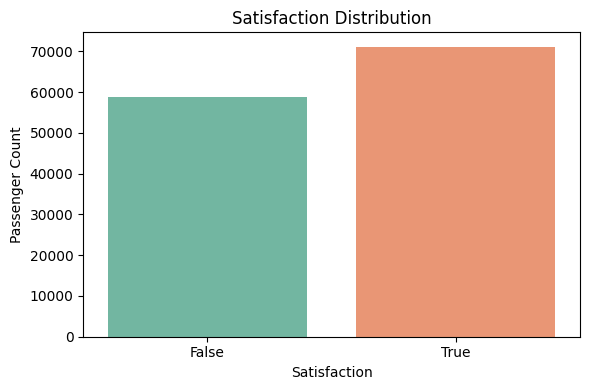

In [ ]:
# 2. Target Variable Distribution
plt.figure(figsize=(6, 4))
# Assuming your target variable is now encoded in columns 'satisfaction_neutral or dissatisfied' and 'satisfaction_satisfied'
# You might need to adjust the column names based on your specific encoding
sns.countplot(data=df, x='satisfaction_satisfied', palette='Set2')  # Use the appropriate column name
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.show()

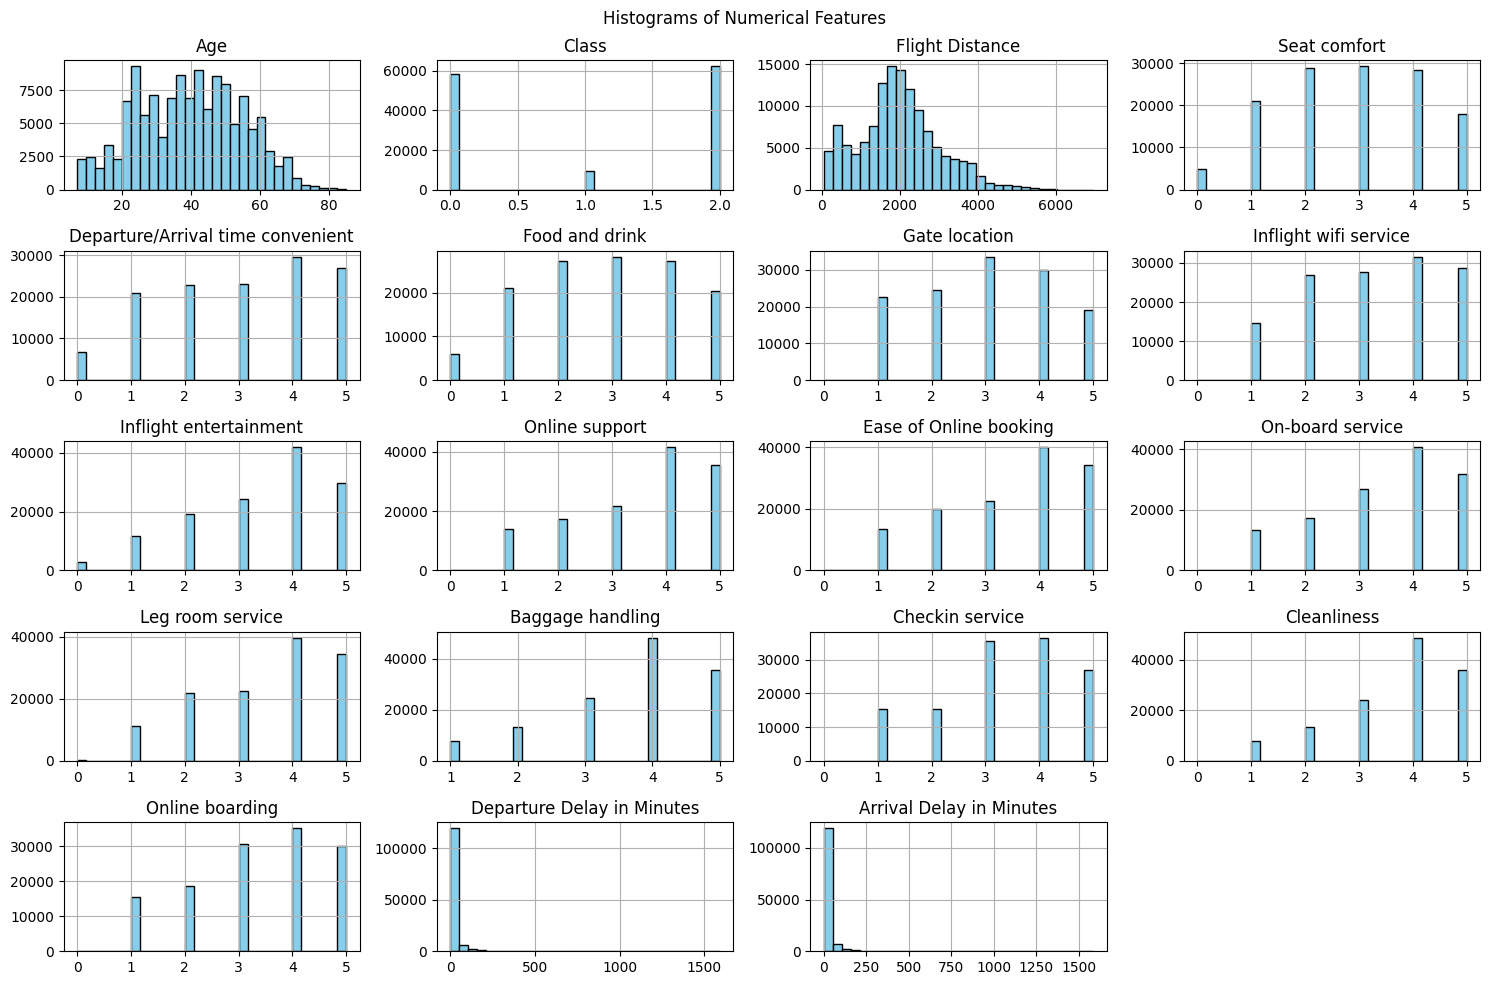

In [ ]:
# 3. Distribution of Numerical Features
# ----------------------------
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(15, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()


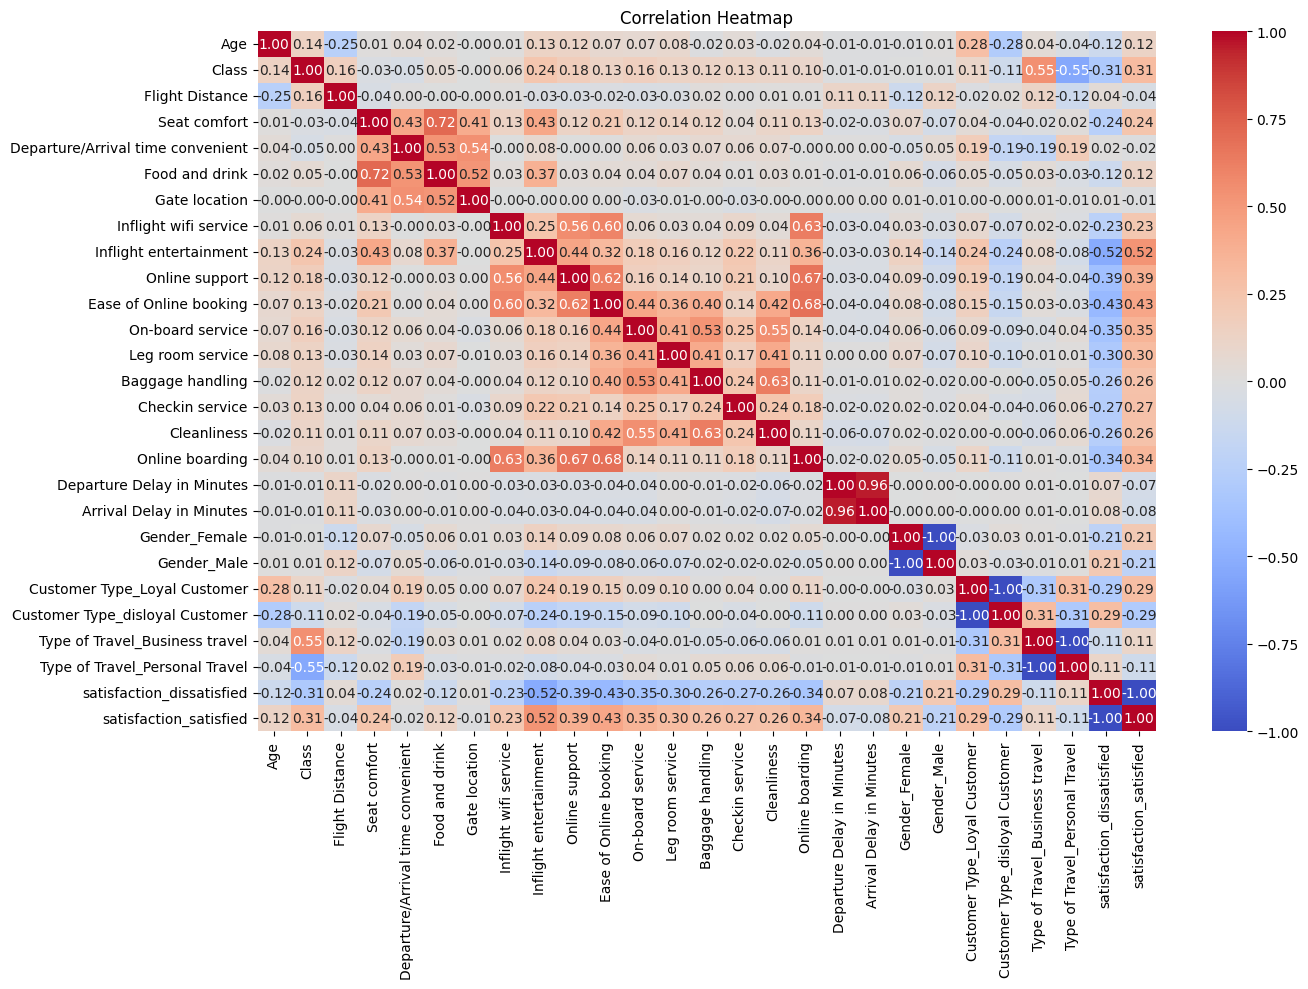

In [ ]:
# ----------------------------
# 5. Correlation Heatmap
# ----------------------------
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


# **OUTLIER DITECTION**

<ipython-input-25-fede95188e81>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='coolwarm')


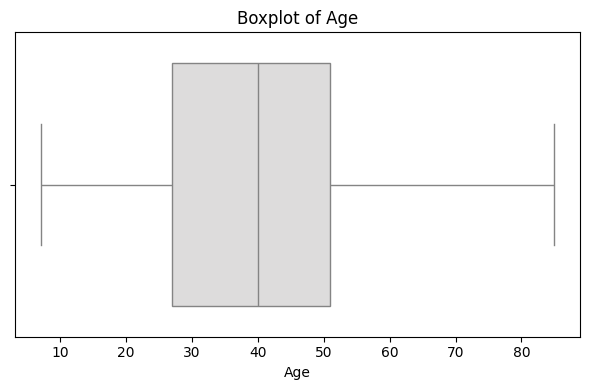

<ipython-input-25-fede95188e81>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='coolwarm')


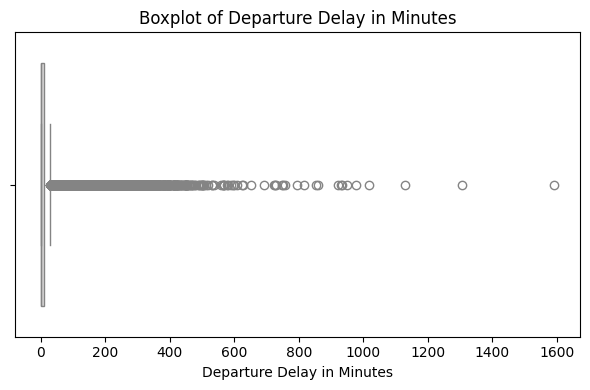

<ipython-input-25-fede95188e81>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='coolwarm')


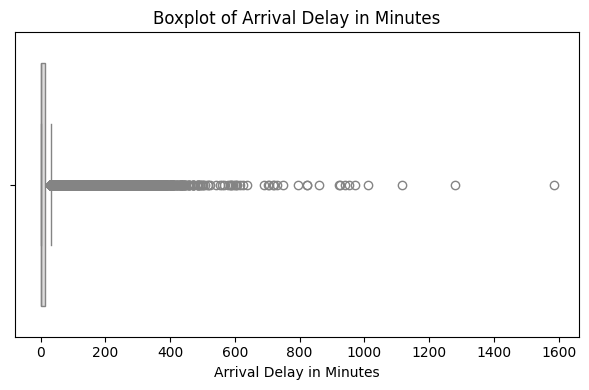

In [ ]:
# List of key numerical features (you can add/remove as needed)
numerical_features = ['Age','Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Outlier detection using boxplots
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], palette='coolwarm')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:
# 2. Handle outliers using IQR
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print(f"New dataset shape after removing outliers: {df.shape}")

New dataset shape after removing outliers: (96111, 27)


# **RandomForestClassifier**

Accuracy: 0.9577069135930916

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.96      0.95      8193
        True       0.97      0.96      0.96     11030

    accuracy                           0.96     19223
   macro avg       0.96      0.96      0.96     19223
weighted avg       0.96      0.96      0.96     19223


Confusion Matrix:
 [[ 7876   317]
 [  496 10534]]


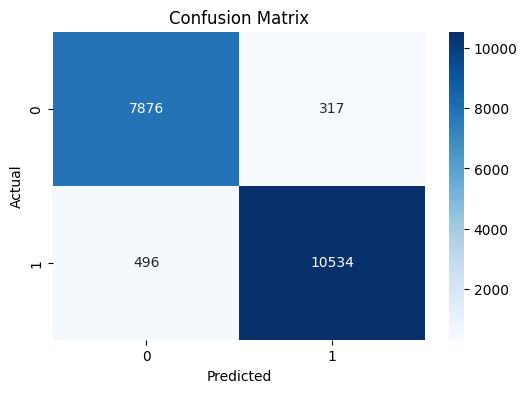

In [ ]:
# Assuming 'satisfaction_satisfied' and 'satisfaction_neutral or dissatisfied' are the new columns
# after one-hot encoding. Adjust the column names if they are different in your case.
X = df.drop(['satisfaction_satisfied', 'satisfaction_dissatisfied'], axis=1)
y = df['satisfaction_satisfied']  # Or use 'satisfaction_neutral or dissatisfied' if it's the positive class

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler # Import StandardScaler

scaler = StandardScaler() # Create a StandardScaler object
X_train_res = scaler.fit_transform(X_train_res) # Fit and transform on training data
X_test = scaler.transform(X_test) # Transform test data using the fitted scaler


# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import necessary modules
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion matrix plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **RandomForestClassifier cross-validation**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline as ImbPipeline  # special pipeline that supports SMOTE

# Build pipeline
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Perform cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Output results
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())


Cross-Validation Accuracy Scores: [0.79664985 0.5690875  0.91161169 0.83570908 0.68322755]
Mean Accuracy: 0.7592571360956557
Standard Deviation: 0.12033288273197018


# **Logistic Regression and XGBoost**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# 1. Split your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

# 4. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train_sm)
y_pred_lr = lr.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# 5. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train_sm)
y_pred_xgb = xgb.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)


Logistic Regression Accuracy: 0.83660198720283


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9569265983457317


# **Logistic Regression and XGBoost Cross-Validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression pipeline
lr_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])                                                             #this is using to find the overfitting

# XGBoost pipeline
xgb_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Cross-validation scores
lr_scores = cross_val_score(lr_pipeline, X, y, cv=cv, scoring='accuracy')
xgb_scores = cross_val_score(xgb_pipeline, X, y, cv=cv, scoring='accuracy')

print("Logistic Regression Cross-Validation Accuracy: {:.4f} ± {:.4f}".format(lr_scores.mean(), lr_scores.std()))
print("XGBoost Cross-Validation Accuracy: {:.4f} ± {:.4f}".format(xgb_scores.mean(), xgb_scores.std()))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Logistic Regression Cross-Validation Accuracy: 0.8349 ± 0.0030
XGBoost Cross-Validation Accuracy: 0.9555 ± 0.0022
